<a href="https://colab.research.google.com/github/Adyypower/Deep-learning-Models-or-topics/blob/main/MNIST_project_new_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tdfs

In [3]:
BUFFER_SIZE = 70_000
BATCH_SIZE = 128
NUM_EPOCHES  = 20

In [4]:
mnist_datset,mnist_info = tdfs.load(name = 'mnist',with_info = True,as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.Y1RRJ2_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.Y1RRJ2_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
mnist_train,mnist_test = mnist_datset['train'],mnist_datset['test']

In [6]:
def scale(image,label):
  image = tf.cast(image,tf.float32)
  image/=255 # Corrected scaling to 0-1 range

  # Ensure the image has a channel dimension (28, 28, 1)
  #image = tf.expand_dims(image, axis=-1)

  return image,label

In [7]:
train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [8]:
num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

In [9]:
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples,tf.int64)

In [10]:
train_and_validation_data = train_and_validation_data.shuffle(BUFFER_SIZE)

In [11]:
train_data  = train_and_validation_data.skip(num_validation_samples)
validation_data = train_and_validation_data.take(num_validation_samples)

In [12]:
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(BATCH_SIZE) # Batch validation data with BATCH_SIZE
test_data = test_data.batch(BATCH_SIZE) # Batch test data with BATCH_SIZE

In [13]:
model  = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50,5,activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(50,3,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary(line_length = 75)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape            ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                │ (None, 24, 24, 50)      │        1,300 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)   │ (None, 12, 12, 50)      │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)              │ (None, 10, 10, 50)      │       22,550 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ max_pooling2d_1 (MaxPooling2D) │ (None, 5, 5, 50)        │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ flatten (Flatten)              │ (None, 1250)            │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense (Dense)                  │ (None, 10)              │       12,510 │
└────────────────────────────────┴─────────────────────────┴──────────────┘

 Total params: 36,360 (142.03 KB)

 Trainable params: 36,360 (142.03 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [16]:
model.compile(optimizer = 'adam',loss = loss_fn,metrics = ['accuracy'])

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 2,
    verbose = 0,
    restore_best_weights = True
)

In [18]:
model.fit(
    train_data,
    epochs = NUM_EPOCHES,
    callbacks = [early_stopping],
    validation_data = validation_data,
    verbose = 2
)

Epoch 1/20
422/422 - 16s - 37ms/step - accuracy: 0.9253 - loss: 0.2631 - val_accuracy: 0.9748 - val_loss: 0.0837
Epoch 2/20
422/422 - 6s - 14ms/step - accuracy: 0.9788 - loss: 0.0719 - val_accuracy: 0.9783 - val_loss: 0.0699
Epoch 3/20
422/422 - 9s - 22ms/step - accuracy: 0.9842 - loss: 0.0525 - val_accuracy: 0.9878 - val_loss: 0.0442
Epoch 4/20
422/422 - 6s - 13ms/step - accuracy: 0.9871 - loss: 0.0427 - val_accuracy: 0.9897 - val_loss: 0.0393
Epoch 5/20
422/422 - 6s - 15ms/step - accuracy: 0.9891 - loss: 0.0361 - val_accuracy: 0.9908 - val_loss: 0.0280
Epoch 6/20
422/422 - 9s - 22ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9930 - val_loss: 0.0232
Epoch 7/20
422/422 - 6s - 14ms/step - accuracy: 0.9917 - loss: 0.0265 - val_accuracy: 0.9917 - val_loss: 0.0257
Epoch 8/20
422/422 - 5s - 12ms/step - accuracy: 0.9924 - loss: 0.0237 - val_accuracy: 0.9945 - val_loss: 0.0188
Epoch 9/20
422/422 - 6s - 14ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.9930 - val_loss

In [19]:
test_loss,test_accuracy = model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9922 - loss: 0.0296


In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
for images,labels in test_data.take(1):
  images_test = images.numpy()
  labels_test = labels.numpy()
images_plot = np.reshape(images_test,(BATCH_SIZE,28,28)) # Reshape to match batch size

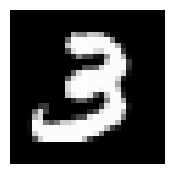

label: 3


In [25]:
i = 26
plt.figure(figsize = (2,2))
plt.axis('off')
plt.imshow(images_plot[i-1],cmap = 'gray',aspect = 'auto')
plt.show()
print("label: {}".format(labels_test[i-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<BarContainer object of 10 artists>

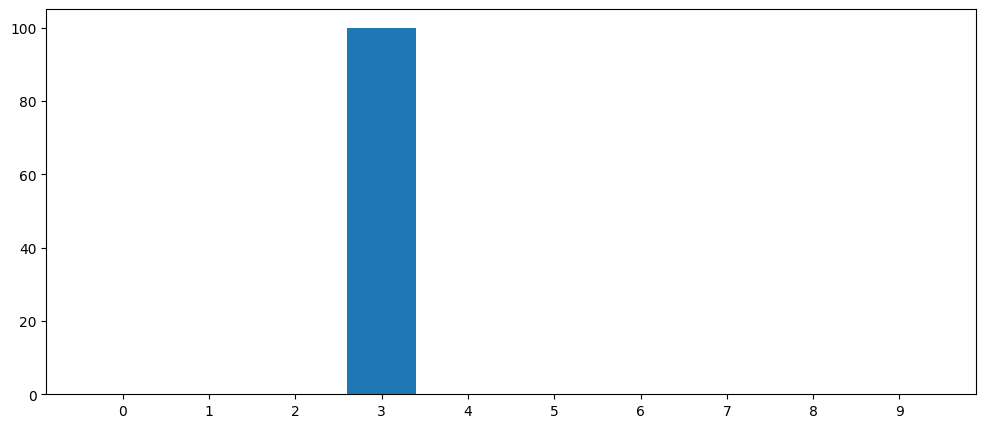

In [26]:
predictions = model.predict(images_test[i-1:i])

probablities = tf.nn.softmax(predictions).numpy()

probablities = probablities*100

plt.figure(figsize = (12,5))
plt.bar(x = [1,2,3,4,5,6,7,8,9,10],height = probablities[0],tick_label = ['0','1','2','3','4','5','6','7','8','9'])